# Classification des MotionClouds - Psychophysique
Ce notebook permet d'observer la limite à partir de laquelle on est incapable de classifier les stimuli visuels de ce projet. Après avoir généré les MotionClouds (MC), l'utilisateur doit classifier 300 MC tirés aléatoirement de 4 orientations et de plusieurs B$\theta$, cette dernière variable controlant le signal/bruit du stimulus.

La durée du test est d'environ 15 minutes.

On génère les listes de valeurs de B$\theta$ :

In [1]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio


downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)

N_theta = 1000
nbr_chunks = 50 

bw_values = np.pi*np.logspace(-7,0, N_theta, base=2)
bw_subsets = np.array_split(bw_values, nbr_chunks)

fig_width = 21

theta_list = [0,np.pi/2, np.pi/4, 3*np.pi/4] #liste des angles theta

Et optionnellement, si on a pas le folder, on le génère. Il est constitué de 50 chunks de difficulté croissante, càd de B$\theta$ croissant.

In [ ]:
for chunk_index, chunk in enumerate(bw_subsets) : #split into ranges
    for t in theta_list :
        if not os.path.exists('./clouds_boundary/chunk%s/%s' % (chunk_index,t)): #si le folder n'existe pas on le crée
            os.makedirs('./clouds_boundary/chunk%s/%s' % (chunk_index,t))

        for i_ax, B_theta in enumerate(chunk):
            mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
            im = mc.random_cloud(mc_i)

            imageio.imwrite('./clouds_boundary/chunk%s/%s/B0 %s.png' % (chunk_index , t, (B_theta*180/np.pi) ) , im[:, :, 0])

Et maintenant on passe à la classification.

La template est disponible [ici](https://imgur.com/a/qYRqn9r).

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image   
import os
import time
start_time = time.time()
print("Test started")


plt.rcParams["figure.figsize"] = [9, 9]
test_length = 301 #test_length-1 tests
trial_number = 1

ans_list = []
corr_list = []
subj_name = input('Please enter your initials : ')
print("If you cannot guess, you can input 5 to skip")
while trial_number < test_length :
    chunk_index = random.randrange(len(bw_subsets)) #chunk randomly picked
    
    chunk_orientation = bw_subsets[chunk_index] #chunk's list of value
    chunk_orientation = (chunk_orientation[1] + chunk_orientation[-1]) / 2 #chunk's mean
    chunk_orientation = chunk_orientation*180/np.pi #and back to angles
    
    orientation_folders = os.listdir('clouds_boundary/chunk%s' % chunk_index)
    orientation_index = random.randrange(len(orientation_folders)) #orientation index randomly picked
    
    image_folder = os.listdir('clouds_boundary/chunk%s/%s'% (chunk_index,
                                                    orientation_folders[orientation_index]) )
    image_index = random.randrange(len(image_folder))
   
    img = Image.open(str('clouds_boundary/chunk%s/%s/%s'% (chunk_index,
                                                    orientation_folders[orientation_index],
                                                      image_folder[image_index])))
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(img.convert('RGBA'))
    f.add_subplot(1,2, 2)
    plt.imshow(Image.open('template.png'))
    plt.show()
    time.sleep(0.2)

    ans = input("Trial no. %s : " % trial_number)
    
    ans_list.append((int(ans), chunk_orientation)) #answer and b_theta value
    corr_list.append(float(orientation_folders[orientation_index]))
    
    trial_number +=1

#print(ans_list)
#print(corr_list)

print("Finished test in  %.3f minutes " % ((time.time() - start_time)/60))

Maintenant on compare les réponses correctes aux réponses du sujet, sortant les datas sous la forme (B_theta , 
correct/faux)

In [3]:
orientation_dict = {0 : 2.356194490192345,
                   1 :  1.5707963267948966,
                    2 : 0.7853981633974483,
                   3 : 0,
                   5 : 0}
orientation_dict = {val:key for (key, val) in orientation_dict.items()} #oops let's swap

out_list = []

for t in range(len(ans_list)) :
    #print(t)
    #print(ans_list[t][0]) #answer
    #print(ans_list[t][1]) #b_theta angle
    #print(orientation_dict[ans_list[t][0]]) #true angle
    #print(corr_list[t]) #true correct angle
    
    if ans_list[t][0] == orientation_dict[corr_list[t]] : #correct answer, code 1
        out_list.append((ans_list[t][1], 1))
    else :
        out_list.append((ans_list[t][1], 0))

print(out_list)

[(11.362780283692848, 0), (5.756783654781848, 1), (3.5419952927328313, 1), (33.077665617214365, 1), (2.179295142231111, 1), (3.5419952927328313, 0), (65.28893028551914, 1), (6.9912153540400235, 1), (4.740314290105863, 0), (128.86775225180955, 0), (156.50096689583134, 0), (65.28893028551914, 0), (2.6466031334520146, 1), (27.23717624482563, 1), (2.179295142231111, 1), (65.28893028551914, 1), (6.9912153540400235, 1), (36.45198965689809, 0), (2.401609741849331, 1), (1.7944992420368964, 1), (7.704404316911276, 1), (4.301508161405737, 0), (96.29086679203641, 0), (65.28893028551914, 0), (10.310939135108153, 1), (2.916588829542423, 1), (7.704404316911276, 1), (3.9033218749356267, 1), (5.223883978785349, 0), (8.490347224698192, 1), (27.23717624482563, 1), (33.077665617214365, 1), (33.077665617214365, 0), (12.521922017351194, 1), (6.344045576538483, 1), (44.26841880064909, 1), (142.0138297107033, 0), (1.6283842510969313, 1), (3.9033218749356267, 0), (87.37731804815145, 0), (33.077665617214365, 0

Et on plot :

No handles with labels found to put in legend.


[(1.6283842510969313, 1), (1.6283842510969313, 1), (1.6283842510969313, 0), (1.6283842510969313, 0), (1.6283842510969313, 0), (1.6283842510969313, 1), (1.7944992420368964, 1), (1.7944992420368964, 1), (1.7944992420368964, 1), (1.7944992420368964, 1), (1.7944992420368964, 0), (1.9775599816208906, 1), (1.9775599816208906, 1), (2.179295142231111, 1), (2.179295142231111, 1), (2.179295142231111, 0), (2.179295142231111, 1), (2.179295142231111, 1), (2.179295142231111, 1), (2.401609741849331, 1), (2.401609741849331, 1), (2.401609741849331, 0), (2.401609741849331, 1), (2.6466031334520146, 1), (2.6466031334520146, 0), (2.6466031334520146, 1), (2.6466031334520146, 1), (2.6466031334520146, 1), (2.916588829542423, 1), (2.916588829542423, 1), (2.916588829542423, 0), (3.2141163490260305, 1), (3.2141163490260305, 0), (3.2141163490260305, 1), (3.2141163490260305, 1), (3.2141163490260305, 1), (3.5419952927328313, 1), (3.5419952927328313, 0), (3.5419952927328313, 1), (3.5419952927328313, 0), (3.541995292

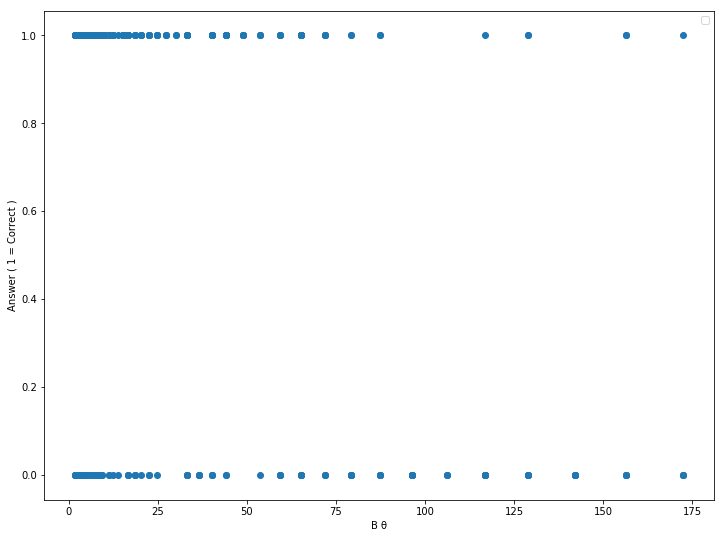

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 9]

plt.xlabel("B θ")
plt.ylabel("Answer ( 1 = Correct )")


out_list.sort(key=lambda x: x[0])
print(out_list)
plt.scatter(*zip(*out_list))

plt.legend()
plt.savefig('Psychophys_graph_subj%s' % subj_name)
plt.show()

On enregistre tout les résultats :

In [10]:
import pickle
pickle.dump(out_list, open('Psychophys_outlist_subj%s.p'%subj_name, 'wb'))